# Web Scraping

O web scraping, também conhecido como extração de dados da web, é o processo de coletar dados estruturados em páginas da web de maneira automatizada.

In [1]:
# Instalação das bibliotecas
!pip install requests --quiet
!pip install pandas --quiet
!pip install beautifulsoup4 --quiet

In [2]:
# Importando as bibliotecas
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [3]:
# URL com a tabela de dados
url = "https://www.fundamentus.com.br/proventos.php?papel=BBSE3&tipo=2"

In [4]:
# Obtendo o conteúdo da página em formato de texto

# https://stackoverflow.com/questions/68259148/getting-404-error-for-certain-stocks-and-pages-on-yahoo-finance-python
headers = {
    'User-Agent'      : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36',
    'Accept'          : 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Language' : 'en-US,en;q=0.5',
    'DNT'             : '1', # Do Not Track Request Header
    'Connection'      : 'close'
}
data = requests.get(url, headers=headers, timeout=5).text
soup = BeautifulSoup(data,"html.parser")

In [5]:
# Procurando a tabela da página
table = soup.find('table') # em html uma tabela é representada pela tag <table>

In [6]:
# Definindo dataframe
df = pd.DataFrame(columns=['Data', 'Valor', 'Tipo', 'Data de Pagamento', 'Por quantas ações'])

In [7]:
# Obtendo todas as linhas da tabela
for row in table.tbody.find_all('tr'): # em html uma linha da tabela é representada pela tag <tr>
    # Obtendo todas as colunas em cada linha
    columns = row.find_all('td')  # em html uma coluna da tabela é representada pela tag <td>
    if(columns != []):
        data = columns[0].text.strip(' ')
        valor = columns[1].text.strip(' ')
        tipo = columns[2].text.strip(' ')
        data_pagamento = columns[3].text.strip(' ')
        quantidade_acoes = columns[4].text.strip(' ')
        df = pd.concat([df, pd.DataFrame.from_records([{'Data': data,  'Valor': valor, 'Tipo': tipo, 'Data de Pagamento': data_pagamento, 'Por quantas ações': quantidade_acoes}])], ignore_index=True)

df.head(20)

,Data,Valor,Tipo,Data de Pagamento,Por quantas ações
0,16/08/2023,"1,6076",DIVIDENDO,28/08/2023,1
1,14/02/2023,"1,8399",DIVIDENDO,01/03/2023,1
2,17/08/2022,"1,0360",DIVIDENDO,29/08/2022,1
3,10/02/2022,"0,9172",DIVIDENDO,23/02/2022,1
4,11/08/2021,"0,5209",DIVIDENDO,23/08/2021,1
5,11/02/2021,"0,4748",DIVIDENDO,25/02/2021,1
6,12/08/2020,"0,8753",DIVIDENDO,24/08/2020,1
7,13/02/2020,"1,8984",DIVIDENDO,27/02/2020,1
8,09/01/2020,"1,3523",REST CAP DIN,30/04/2020,1
9,09/08/2019,"0,8907",DIVIDENDO,21/08/2019,1


In [8]:
# Refatorando o dataframe

# Data
df['Data'] = pd.to_datetime(df['Data'], format="%d/%m/%Y", errors='ignore')

# Valor
df['Valor'] = [x.replace(',', '.') for x in df['Valor']]
df = df.astype({"Valor": float})

# Data de Pagamento
temp = pd.to_datetime(df["Data de Pagamento"], format="%d/%m/%Y", errors='coerce')
df["Data de Pagamento"] = df["Data de Pagamento"].where(temp.isna(), temp.dt.date)

# Tipo
df['Tipo'] = df['Tipo'].str.upper()

# Por quantas ações
df = df.astype({"Por quantas ações": int})

df.head(20)

,Data,Valor,Tipo,Data de Pagamento,Por quantas ações
0,2023-08-16,1.6076,DIVIDENDO,2023-08-28,1
1,2023-02-14,1.8399,DIVIDENDO,2023-03-01,1
2,2022-08-17,1.0360,DIVIDENDO,2022-08-29,1
3,2022-02-10,0.9172,DIVIDENDO,2022-02-23,1
4,2021-08-11,0.5209,DIVIDENDO,2021-08-23,1
5,2021-02-11,0.4748,DIVIDENDO,2021-02-25,1
6,2020-08-12,0.8753,DIVIDENDO,2020-08-24,1
7,2020-02-13,1.8984,DIVIDENDO,2020-02-27,1
8,2020-01-09,1.3523,REST CAP DIN,2020-04-30,1
9,2019-08-09,0.8907,DIVIDENDO,2019-08-21,1


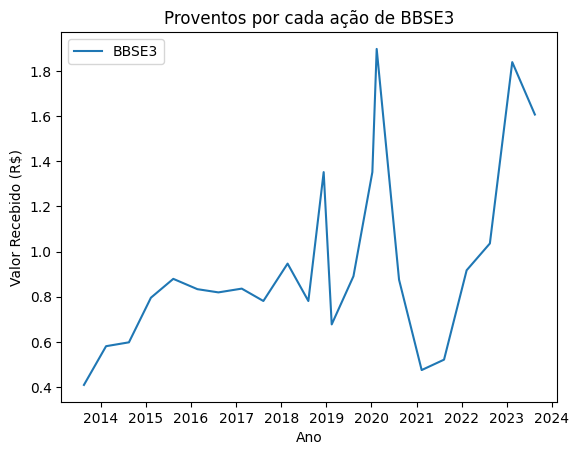

In [9]:
# Gráfico de proventos
plt.plot(df['Data'], df['Valor']/df['Por quantas ações'], label='BBSE3')
plt.title("Proventos por cada ação de BBSE3")
plt.ylabel("Valor Recebido (R$)")
plt.xlabel("Ano")
plt.legend()
plt.show()

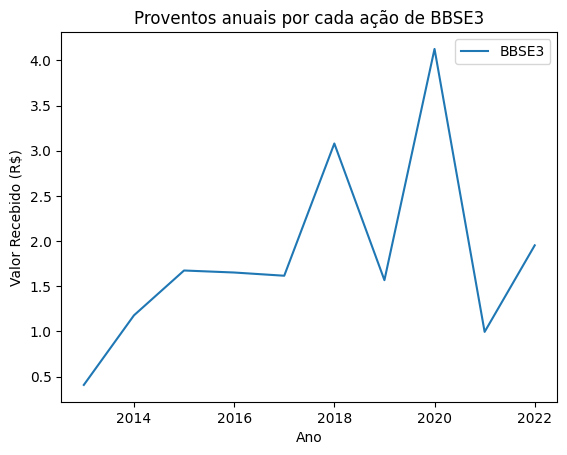

In [10]:
# Gráfico de proventos anuais
df_anual = df.set_index('Data')
dividendos = (df_anual['Valor']/df_anual['Por quantas ações']).resample('Y').sum()
plt.plot(dividendos.index.year[:-1], dividendos[:-1], label='BBSE3')
plt.title("Proventos anuais por cada ação de BBSE3")
plt.ylabel("Valor Recebido (R$)")
plt.xlabel("Ano")
plt.legend()
plt.show()

In [11]:
# Exportando dados
df.to_csv('bbse3.csv', index=False)